In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#multiple

def plot_metrics_multiple(history_list, description_list, filename=None, val_acc_only=False):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    for index, history in enumerate(history_list):
        acc = history['accuracy']
        acc_val = history['val_accuracy']
        epochs = len(history.index)
        epochs_range = range(epochs)

        if not val_acc_only:
            plt.plot(epochs_range, acc, label=('Training Acc. ' + description_list[index]))
            plt.plot(epochs_range, acc_val, label=('Validation Acc. '  + description_list[index]))
        else:
            plt.plot(epochs_range, acc_val, label=(description_list[index]))

    plt.legend(loc='lower right')
    if val_acc_only:
        plt.title('Validation Accuracy')
    else:
        plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')

    plt.subplot(1, 2, 2)
    for index, history in enumerate(history_list):
        loss = history['loss']
        loss_val = history['val_loss']
        epochs = len(history.index)
        epochs_range = range(epochs)

        
        if not val_acc_only:
            plt.plot(epochs_range, loss, label=('Training Loss ' + description_list[index]))
            plt.plot(epochs_range, loss_val, label=('Validation Loss ' + description_list[index]))
        else:
            plt.plot(epochs_range, loss_val, label=(description_list[index]))


    plt.legend(loc='upper right')
    if val_acc_only:
        plt.title('Validation Loss')
    else:
        plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.show()

    if filename != None:
        fig.savefig(filename, dpi=200)

In [ ]:
#loading history:

hist_path1 = 'history-lstm-1-apr-b512-dropout0-2-bn-dim128-emb-untr-epochs-700-2-layer.csv'
history1 = pd.read_csv(hist_path1)

hist_path2 = 'history-lstm-1-apr-b512-dropout0-2-bn-dim128-emb-untr-epochs-100-2-layer-no-attention.csv'
history2 = pd.read_csv(hist_path2)

hist_path3 = 'history-lstm-1-apr-b512-no-dropout0-2-bn-dim128-emb-untr-epochs-100-2-layer.csv'
history3 = pd.read_csv(hist_path3)

hist_path4 = 'history-lstm-1-apr-b512-dropout0-2-bn-dim128-emb-untr-epochs-800-2-layer-lemm.csv'
history4 = pd.read_csv(hist_path4)



In [ ]:
#crop
history1 = history1.iloc[0:100]

Combined

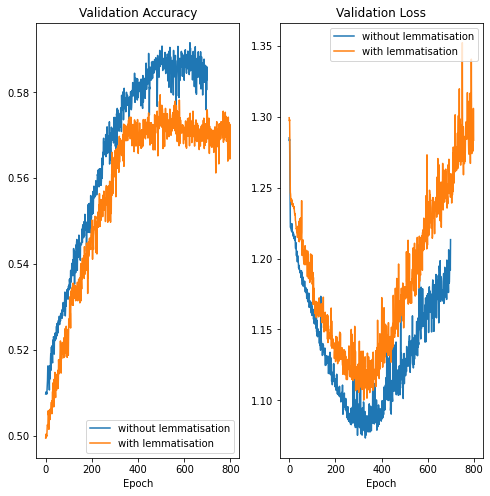

In [ ]:
description = ["base model", "no attention", "no dropout", "with lemmatisation"]
description = ["without lemmatisation", "with lemmatisation"]


# export_fn = None
export_fn = "lemmatisation.png"

# plot_metrics_multiple([history1, history2, history3, history4], description, export_fn, val_acc_only=True)
plot_metrics_multiple([history1, history4], description, export_fn, val_acc_only=True)


In [ ]:
#download png

from google.colab import files
files.download(export_fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def convergence_epoch(history):   # minimum validation loss
    df_loss = pd.DataFrame(data=history['val_loss'])
    df_loss['rolling_avg'] = df_loss['val_loss'].rolling(window=10, min_periods=10).mean()
    df_loss.rolling_avg.plot()
    conv_index = df_loss.rolling_avg.idxmin() 
    print('Epoch at convergence: {}'.format(conv_index + 1))
    print('Validation loss at convergence = {}'.format(df_loss.val_loss.loc[conv_index]))
    print('Validation accuracy at convergence = {}'.format(history['val_accuracy'].loc[conv_index]))


Epoch at convergence: 256
Validation loss at convergence = 1.1231299638748171
Validation accuracy at convergence = 0.5606399178504944


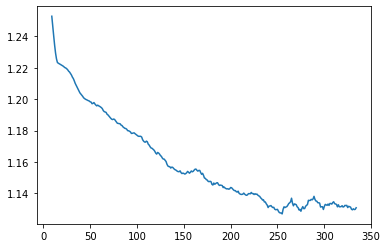

In [ ]:
convergence_epoch(history6)

In [ ]:
def timing(history):
    training_time = history['training_time'].iloc[0]
    print('Training time = {}'.format(training_time))
    print('Number of epochs = {}'.format(len(history['accuracy'])))

In [ ]:
timing(history1)

Training time = 935.7313425540924
Number of epochs = 400


In [ ]:
(123/250)*1742

857.064

In [ ]:
history1['val_accuracy'].loc[251]

0.5692968368530273

In [ ]:
hist_path6 = 'history-lstm-2-apr-b512-dropout0-2-bn-dim128-emb-untr-epochs-335-2-layer-ttv-final.csv'
history6 = pd.read_csv(hist_path6)
# history6 = history6.iloc[:340]

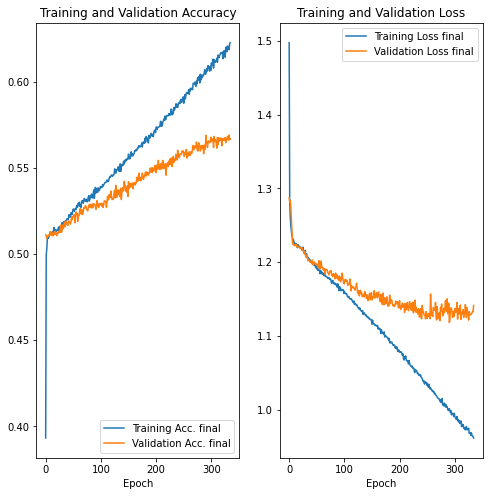

In [ ]:
plot_metrics_multiple([history6], ['final'])

In [ ]:
print('validation accuracy: {}'.format(history6['val_accuracy'].iloc[334]))

validation accuracy: 0.566778302192688
